# Discrete cosine transform (DCT)

[DCT on wikipedia](https://en.wikipedia.org/wiki/Discrete_cosine_transform)

## Done:
- built orthogonal basis and matrix of DCT
- denoising signals

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Building orthogonal basis

$ f(x_i) = \cos(k x_i) $, where $ k = 0, 1, ..., n-1 $

$ x_i^j = \frac{\pi * j}{n} + \frac{\pi}{2n}  $

#### DCT matrix:
$ A = {\{ \cos(x_i^j) \}}_{i, j}^{n \times n} $

In [3]:
def get_dct_basis(n):
    step = np.pi / n
    shift = step / 2.

    angles = np.linspace(shift, np.pi - shift, n)
    cos_tr = np.zeros((n, n))
    
    for k in range(n):
        v = np.cos(k * angles)
        cos_tr[k, :] = v / np.linalg.norm(v, ord=2)
    
    return cos_tr

In [4]:
n = 8

A = get_dct_basis(n)

In [5]:
step = np.pi / n
shift = step / 2.
angles = np.linspace(shift, np.pi - shift, n)
sin_tr = np.zeros((n, n))

array([ 0.90929743, -0.37840125, -0.0931385 ,  0.24733956, -0.10880422,
       -0.08942882,  0.14151534, -0.03598791])

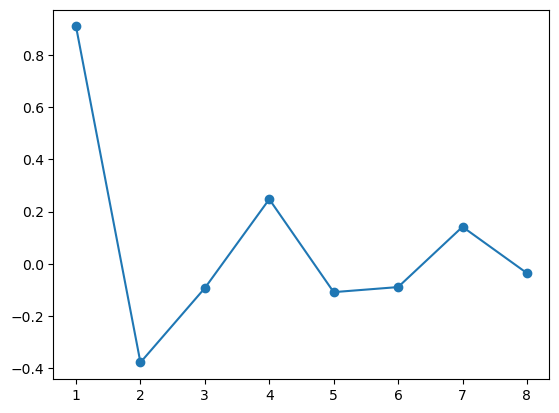

In [6]:
X = np.linspace(1, 8, n)
v = np.sin(2*X) / X

plt.plot(X, v, 'o-', label=f'v0')
v

In [7]:
np.mean(v)

0.07404895269100167

### Attempts of reconstructing vectors

[0.07404895 0.07404895 0.07404895 0.07404895 0.07404895 0.07404895
 0.07404895 0.07404895]


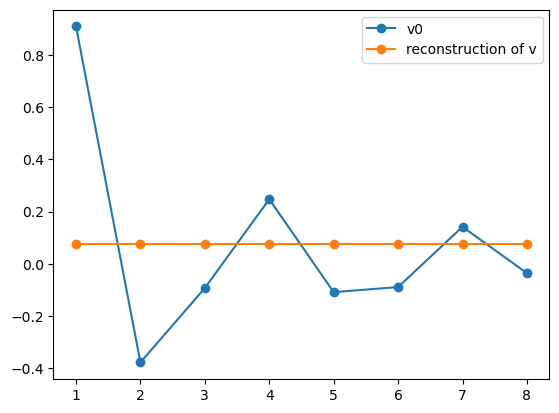

In [8]:
recovery_rate = 1 / 8

count = round(recovery_rate * n)

u = A @ v.T
if count < n:
    u[count:] = 0
v_reconstructed = A.T @ u
print(v_reconstructed)

plt.plot(X, v, 'o-', label=f'v0')
plt.plot(X, v_reconstructed, 'o-', label=f'reconstruction of v')
plt.legend()

## Discrete cosine transform full cycle

In [9]:
def get_dct_mtx(n):
    """
    return DCT matrix
    """
    step = np.pi / n
    shift = step / 2.

    angles = np.linspace(shift, np.pi - shift, n)
    cos_tr = np.zeros((n, n))
    
    for k in range(n):
        v = np.cos(k * angles)
        cos_tr[k, :] = v / np.linalg.norm(v, ord=2)
    
    return cos_tr

In [10]:
def discrete_cos_tfs(v, recovery_rate=0.75):
    """
    return reconstructed vector
    """
    n = len(v)
    A = get_dct_mtx(n)
    
    count = round(recovery_rate * n)
    
    u = A @ v
    if count < n:
        u[count:] = 0
        
    v_reconstructed = A.T @ u
    return v_reconstructed

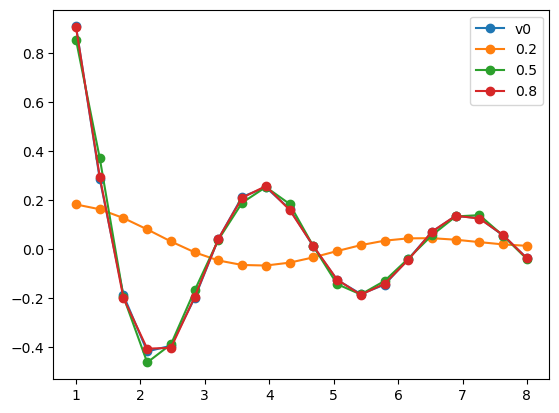

In [11]:
# function
n = 20
X = np.linspace(1, 8, n)
v = np.sin(2*X) / X

# reconstruction
recons_count = 5
s = 1. / recons_count
recon_rates = np.linspace(s, 1 - s, recons_count - 2)
# recon_rates = [0.4]

plt.plot(X, v, 'o-', label=f'v0')
recons = []

for i, r in enumerate(recon_rates):
    v_recon = discrete_cos_tfs(v, r)
    recons.append(v_recon)
    plt.plot(X, v_recon, 'o-', label=f'{recon_rates[i]}')

plt.legend()

## Denoising

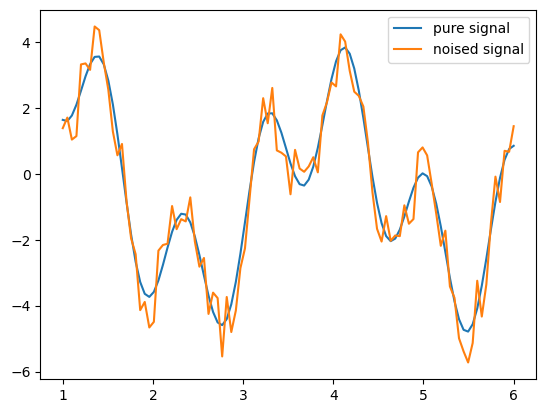

In [12]:
# creating signals of n measures
n = 100
X = np.linspace(1, 6, n)
v_pure = np.sin(X + 1) + 3*np.sin(2*X) + 2*np.sin(7*X + 4)

# noising signal
max_abs = np.max(np.abs(v_pure))
noise_level = 0.20
v = v_pure + noise_level*(np.random.rand(n) * 2*max_abs - max_abs)

# plotting
plt.plot(X, v_pure, label=f'pure signal')
plt.plot(X, v, label=f'noised signal')
plt.legend()

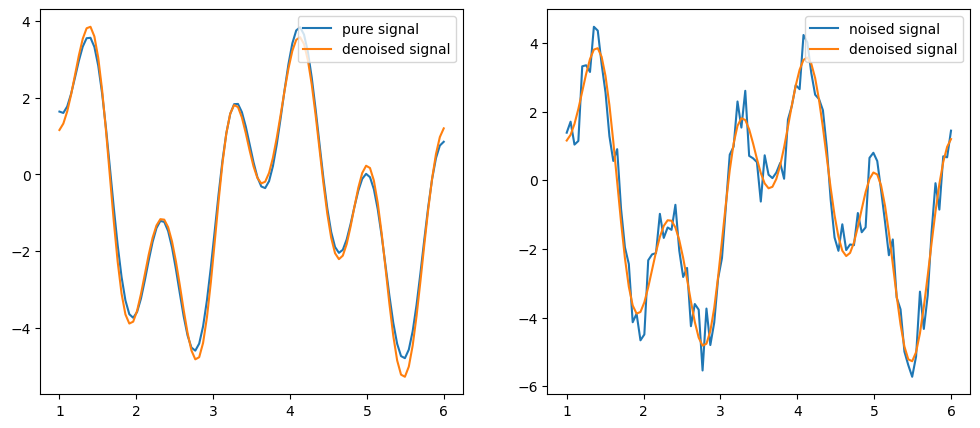

In [13]:
recon_rate = 0.2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(X, v_pure, label=f'pure signal')
ax2.plot(X, v, label=f'noised signal')

# denoising and plotting
v_recon = discrete_cos_tfs(v, recon_rate)
ax1.plot(X, v_recon, label=f'denoised signal')
ax2.plot(X, v_recon, label=f'denoised signal')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
None

## Denoising "long" signal

In [14]:
def denoise(signal: np.array, rate=0.4, window_size=50, cover_size=10):
    """
    function that denoise the input signal by sliding window
    """
    n = len(signal)
    denoised_signal = signal.copy()
    
    for start in range(0, n, window_size - cover_size):
        end = min(n, start + (window_size - cover_size))
        
        if start == end:
            break
        
        denoised = discrete_cos_tfs(signal[start:end], rate)
        
        if start > 0:
            denoised_signal[start:start+cover_size] += denoised[:cover_size]
            denoised_signal[start:start+cover_size] /= 2
        else:
            denoised_signal[start:start+cover_size] = denoised[:cover_size]
        
        denoised_signal[start+cover_size:end] = denoised[cover_size:]
        
    return denoised_signal

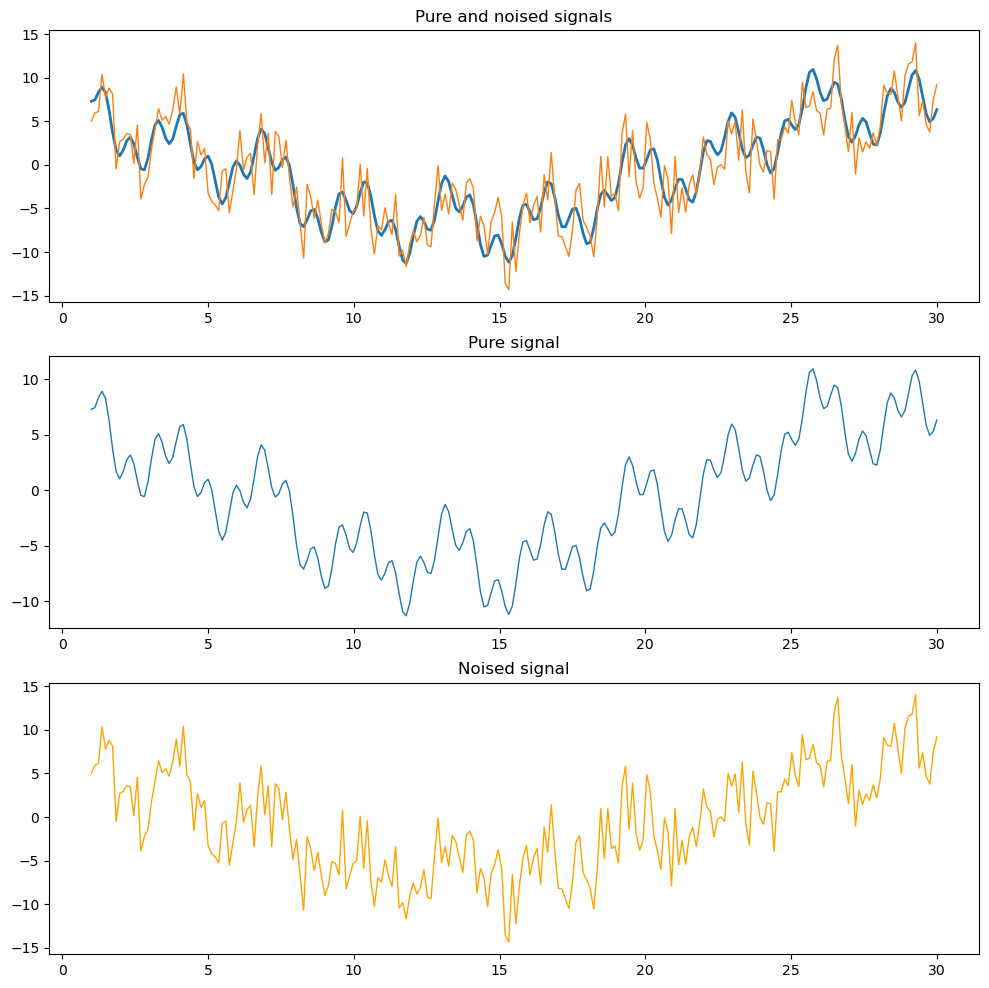

In [15]:
# creating, noising and plotting function
n = 240
X = np.linspace(1, 30, n)
v_pure = np.sin(X + 1) + 3*np.sin(2*X) + 2*np.sin(7*X + 4) + 7*np.sin(1/5 * X + 2)

max_abs = np.max(np.abs(v_pure))
noise_level = 0.40
v = v_pure + noise_level*(np.random.rand(n) * 2*max_abs - max_abs)

fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax[0].plot(X, v_pure, '-', label=f'pure signal', linewidth=2)
ax[0].plot(X, v, '-', label=f'noised signal', linewidth=1)
ax[0].set_title('Pure and noised signals')
ax[1].plot(X, v_pure, '-', label=f'pure signal', linewidth=1)
ax[1].set_title('Pure signal')
ax[2].plot(X, v, 'orange', label=f'noised signal', linewidth=1)
ax[2].set_title('Noised signal')
None

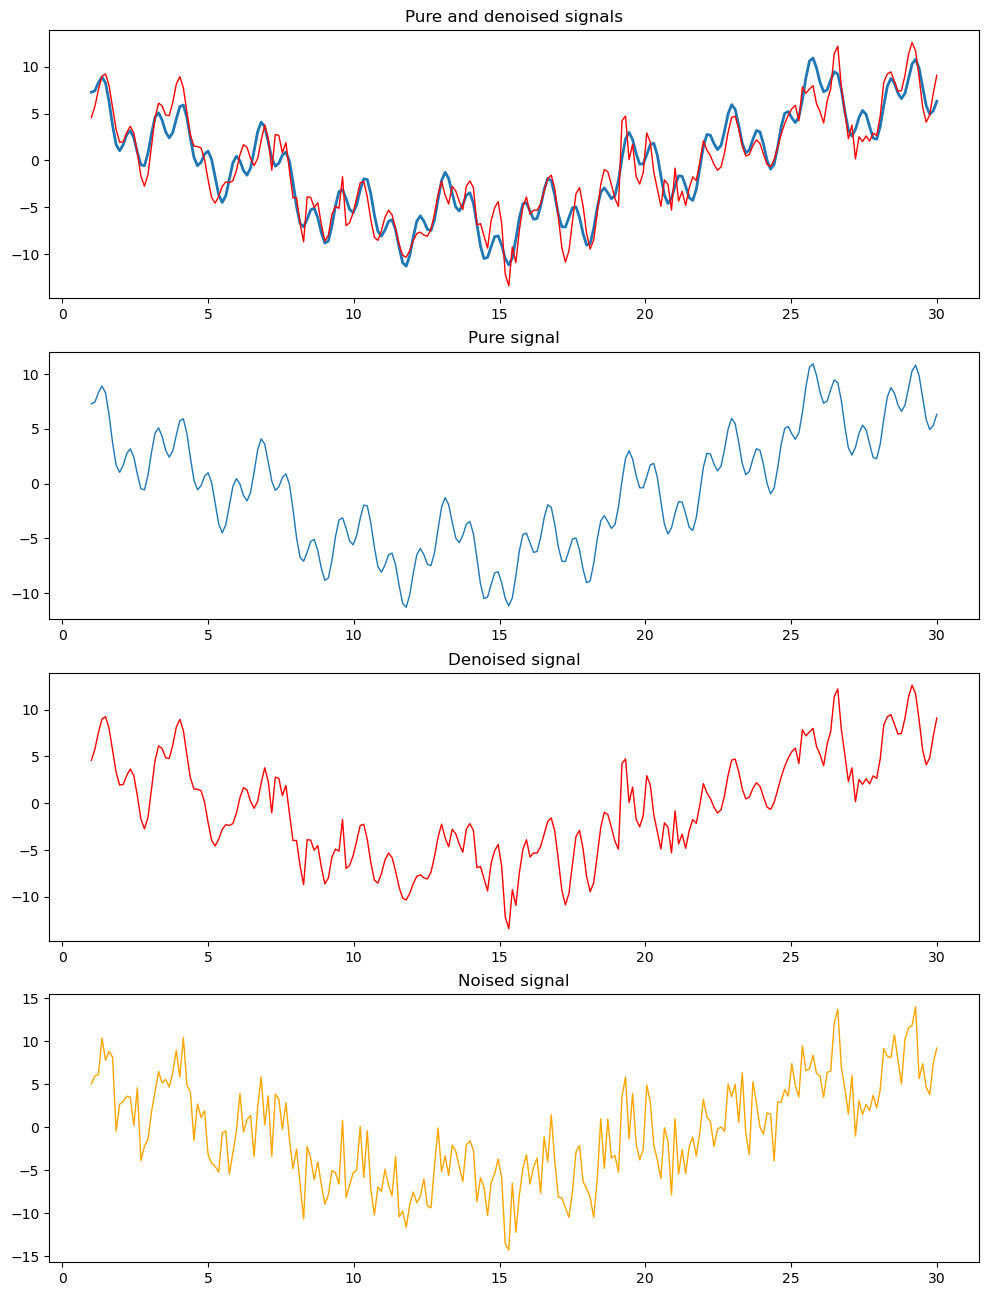

In [16]:
# denoising and plotting function
denoised_v = denoise(v, rate=0.35, window_size=75, cover_size=25)

fig, ax = plt.subplots(4, 1, figsize=(12, 16))
ax[0].plot(X, v_pure, '-', label=f'pure signal', linewidth=2)
ax[0].plot(X, denoised_v, 'r-', label=f'denoised signal', linewidth=1)
ax[0].set_title('Pure and denoised signals')
ax[1].plot(X, v_pure, '-', label=f'pure signal', linewidth=1)
ax[1].set_title('Pure signal')
ax[2].plot(X, denoised_v, 'red', label=f'denoised signal', linewidth=1)
ax[2].set_title('Denoised signal')
ax[3].plot(X, v, 'orange', label=f'noised signal', linewidth=1)
ax[3].set_title('Noised signal')
None

## Image compression

In [17]:
import cv2

In [18]:
img = cv2.imread('cool_cat.png')

In [19]:
img.dtype

dtype('uint8')

In [20]:
img = img / 256

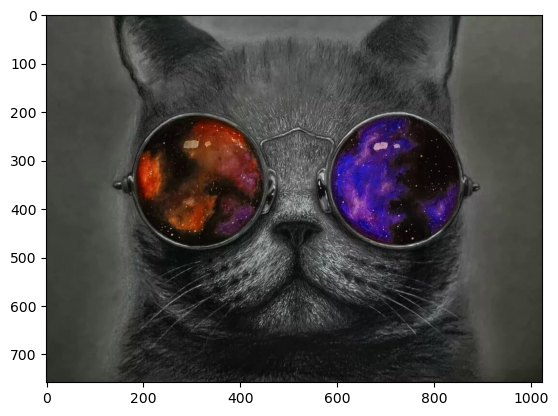

In [21]:
plt.imshow(img)

In [22]:
s = img.shape

In [23]:
img.shape, img.size

((758, 1024, 3), 2328576)

In [33]:
def compress(V, recovery_rate=0.4):
    """
    return compressed V
    i.e. Reverse_DCT(DCT(V))
    """
    n = V.shape[0]
    A = get_dct_mtx(n)
    count = round(recovery_rate * n)
    
    U = A @ V
    
    if count < n:
        U[count:, :] = 0
        
    V_compressed = A.T @ U
    return V_compressed

In [34]:
c_img = np.array([compress(img[:, :, i], 0.2) for i in range(img.shape[2])]).transpose(1, 2, 0)

In [35]:
np.min(c_img), np.max(c_img)

(-0.11042236179117568, 0.9621598780526405)

In [36]:
c_img[c_img < 0] = 0
c_img[c_img > 1] = 1

np.min(c_img), np.max(c_img)

(0.0, 0.9621598780526405)

Text(0.5, 1.0, 'compressed image')

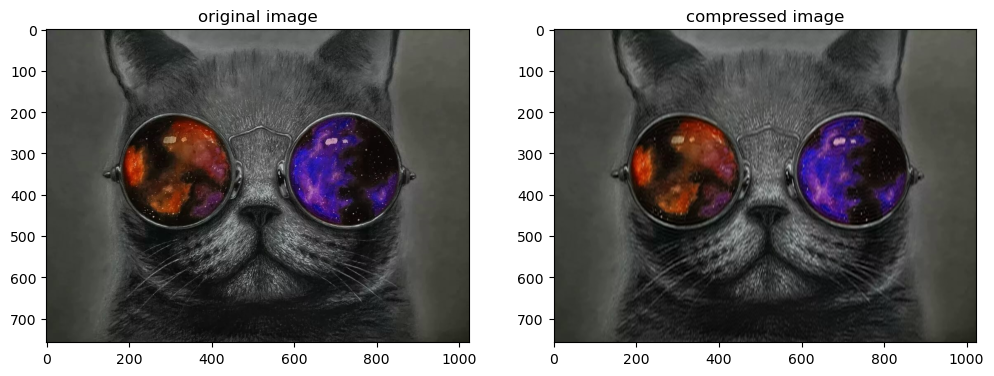

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img)
ax1.set_title('original image')

ax2.imshow(c_img)
ax2.set_title('compressed image')